In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn: A machine learning library
from sklearn.model_selection import train_test_split 
# train_test_split is used to split our data into training and testing sets,
# which is crucial for evaluating our model's performance on unseen data.

from sklearn.linear_model import LinearRegression # LinearRegression is the class we use to create and train our regression models.

from sklearn.metrics import mean_squared_error, r2_score
# These functions help us evaluate the performance of our regression models:
# - mean_squared_error calculates the average squared difference between predicted and actual values
# - r2_score calculates the coefficient of determination, indicating how well our model fits the data

In [11]:
# Load the data
data = pd.read_csv('sample_recs_data_lr.csv')

In [12]:
# Simple Linear Regression
print("Simple Linear Regression")
print("------------------------")

X = data[['TOTSQFT_EN']] # pandas DataFrame for the sake of consistency with the possibility of having multiple input features.
y = data['TOTALBTUSPH'] # pandas Series containing the single target variable.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse_simple = mean_squared_error(y_test, y_pred)
r2_simple = r2_score(y_test, y_pred)

print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared score: {r2_simple:.4f}")

Simple Linear Regression
------------------------
Coefficient: 2.1043
Intercept: 5869.2013
R-squared score: 0.0038


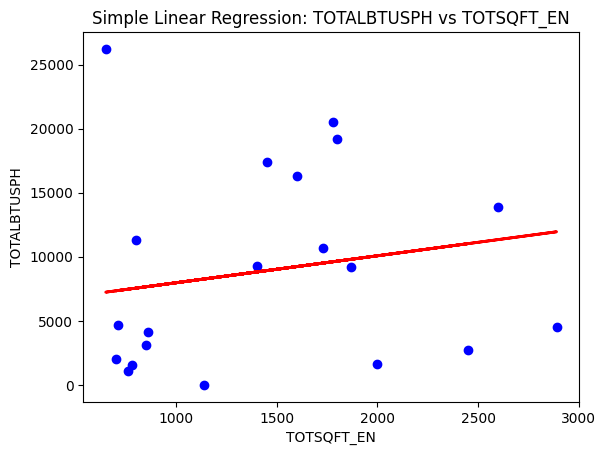

In [13]:
# Visualize the results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Simple Linear Regression: TOTALBTUSPH vs TOTSQFT_EN')
plt.xlabel('TOTSQFT_EN')
plt.ylabel('TOTALBTUSPH')
plt.show()

In [14]:
# Multiple Linear Regression
print("\nMultiple Linear Regression")
print("---------------------------")

X_multiple = data[['TOTSQFT_EN', 'HDD65', 'HDD30YR_PUB']]

# Split the data into training and testing sets
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Create and train the model
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train)

# Make predictions
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Evaluate the model
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Coefficients:")
for feature, coef in zip(X_multiple.columns, model_multiple.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {model_multiple.intercept_:.4f}")
print(f"Mean squared error: {mse_multiple:.4f}")
print(f"R-squared score: {r2_multiple:.4f}")


Multiple Linear Regression
---------------------------
Coefficients:
  TOTSQFT_EN: 1.7967
  HDD65: -3.1703
  HDD30YR_PUB: 14.8431
Intercept: -9623.4544
Mean squared error: 71270960.2161
R-squared score: -0.2635


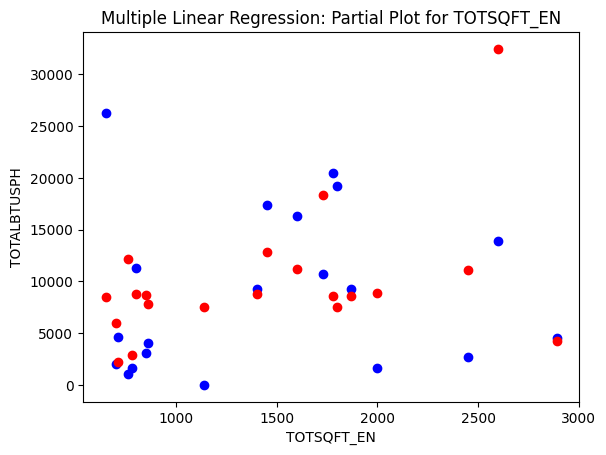

In [15]:
# Visualize the results (partial regression plot for TOTSQFT_EN)
plt.scatter(X_test_multiple['TOTSQFT_EN'], y_test, color='blue')
plt.scatter(X_test_multiple['TOTSQFT_EN'], y_pred_multiple, color='red')
plt.title('Multiple Linear Regression: Partial Plot for TOTSQFT_EN')
plt.xlabel('TOTSQFT_EN')
plt.ylabel('TOTALBTUSPH')
plt.show()